Αικατερίνη Δρακάκη <br>
1115201300041 <br>
Νικόλαος Μακρυγεώργος <br>
1115201500238

*****
*****
#  Ανάλυση Δεδομένων      
*****
*****

In [1]:
import nltk
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
from pandas import DataFrame
from collections import Counter
#nltk.download('all')
import pandas as pd
import sys
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk import sent_tokenize
from nltk import word_tokenize
from collections import Counter
#nltk.download(u'stopwords')
from nltk.corpus import stopwords
from nltk.stem import StemmerI, RegexpStemmer, LancasterStemmer, ISRIStemmer, PorterStemmer, SnowballStemmer, RSLPStemmer

Εδώ φτιάχνουμε ενα string με όλα τα tweets χωρίς τους αριθμούς μπροστά απο αυτά και την κατάσταση που έχουν. <br>
Επίσης έχουμε κάνει όλα τα κεφαλαία γράμματα μικρά. <br>
Το string ειναι το small_character_tweets.

In [38]:
small_character_tweets = ""
results = []
stop__words = set(stopwords.words('english'))

with open("train2017.tsv", encoding="utf8" ) as file_in_put:
    for line in file_in_put:
        field = line.split()
        #line = field[3].lower();
        results.append(field[2]);
        line = line.lower()
        list = []
        list = line.split()
        for i in range(len(list)):
            if i > 2 and list[i] not in stop__words and len(list[i]) > 1:
                small_character_tweets+=list[i]
                small_character_tweets+=" "
        small_character_tweets+="\n"
        del list[:]

#print(len(results))

Κάνουμε καιθαρισμό του string small_character_tweets. <br>
Αφαιρούμε δηλαδή τους χαρακτήρες  < ! > , . $ - _ & # @ ; :  / \ ' 

In [39]:
small_character_tweets = small_character_tweets.replace(',','').replace('-','').replace('_','').replace('<','')
small_character_tweets = small_character_tweets.replace('>','').replace('"  "" "', '').replace('#','')
small_character_tweets = small_character_tweets.replace('&','').replace('+','').replace('=','').replace('/','')
small_character_tweets = small_character_tweets.replace('(','').replace(')','').replace(':','').replace('!','')
small_character_tweets = small_character_tweets.replace('?','').replace(';','').replace('$','')
small_character_tweets = small_character_tweets.replace("'m"," am").replace('.','')
small_character_tweets = small_character_tweets.replace('"\"','').replace('\\','').replace('\'s','').replace('\'','')
small_character_tweets = small_character_tweets.replace('u2019',' ').replace('u002c','')

Οπου υπάρχει μέσα στο string λέξη που αρχίζει με @ την αντικαθιστούμε με user και όπου υπάρχει λέξη που αρχίζει με http
το αφαιρούμε. <br>
Φτιάχνουμε 3 λίστες απο κάθε μια έχει τα θετικά,αρνητικά και ουδέτερα tweets αντίστοιχα.

In [40]:
tweets2 = ""
tweets2 = re.sub(r'(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)', r' user ', small_character_tweets)
tweets2 = ' '.join(word for word in tweets2.split(' ') if not word.startswith('http'))

tweetList = []
posTweets = []
negTweets = []
netTweets = []

tweetList = tweets2.split('\n')
tweetList.pop(len(tweetList)-1)
#print (len(tweetList))

i = 0
while i < len(tweetList):
    if results[i] == 'positive':
        posTweets.append(tweetList[i])
    elif results[i] == 'negative':
        negTweets.append(tweetList[i])
    elif results[i] == 'neutral':
        netTweets.append(tweetList[i])
    i += 1

#print (len(posTweets)+len(negTweets)+len(netTweets))

Φτιάχνουμε λίστα με όλες τις λέξεις των καθαρισμένων tweets. <br>
Επίσης αφαιρούμε τις stopwords αν υπάρχουν.

In [41]:
tokens = word_tokenize(tweets2)
tokens = [w for w in tokens if not w in stopwords.words('english')]
#print(len(tokens))

Εμφανίζουμε τις 20 λέξεις που εμφανίζονται τις περισσότερες φορες στα tweets. <br>
Στη συνέχεια πο την λίστα με όλες τις λέξεις αφαιρούμε τις διπλότυπες.

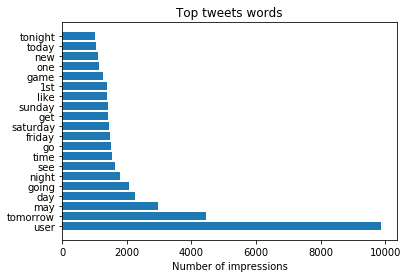

In [42]:
count_tokens = Counter(tokens)
stop=0
l1 = []
l2 = []
for i in count_tokens.most_common():
    if stop == 20:
        break
    l1.append(i[0])
    l2.append(i[1])
    stop=stop+1

    
def graph_1(l1,l2):
    
    y_pos = np.arange(len(l1))
    plt.barh(y_pos, l2, align='center', alpha=1)
    plt.yticks(y_pos, l1)
    plt.xlabel('Νumber of impressions')
    plt.title('Top tweets words')
    

graph_1(l1,l2)
    
tokens2 = []
for i in range(len(tokens)):
    if tokens[i] in tokens2:
        continue
    else:
        tokens2.append(tokens[i])

tokens = tokens2[:]
del tokens2[:]

Βάζουμε το λεξικό generic σε λίστα.

In [43]:
lex1 = []

with open('generic.txt') as f:
    for lines in f:
        k = lines.split()
        lex1.append(k[0])
        lex1.append(k[1])

Φτιάχνουμε 3 λίστες για τις θετικές,αρνητικές και ουδέτερες λέξεις του λεξικού.

In [44]:
positive_words1 = []
negative_words1 = []
natural_words1 = []

for i in range(len(lex1))[::2]:
    if float(lex1[i+1]) == 0.0:
        natural_words1.append(lex1[i])
        natural_words1.append(lex1[i+1])
    elif float(lex1[i+1]) > 0.0:
        positive_words1.append(lex1[i])
        positive_words1.append(lex1[i+1])
    elif float(lex1[i+1]) < 0.0:
        negative_words1.append(lex1[i])
        negative_words1.append(lex1[i+1])

Φτιάχνουμε 3 λίστες με τις θετικές, αρνητικές και ουδέτερες λέξεις των tweets.

In [45]:
list_of_positive_words = []
list_of_negative_words = []
list_of_natural_words = []

top_positive = []
top_negative = []

for token in tokens:
    if token in natural_words1:
        for j in range(len(natural_words1))[::2]:
            if natural_words1[j] == token:
                list_of_natural_words.append(natural_words1[j])
                list_of_natural_words.append(natural_words1[j+1])
                break
    elif token in positive_words1:
        for j in range(len(positive_words1))[::2]:
            if positive_words1[j] == token:
                list_of_positive_words.append(positive_words1[j])
                list_of_positive_words.append(positive_words1[j+1])
                break            
    elif token in negative_words1:
        for j in range(len(negative_words1))[::2]:
            if negative_words1[j] == token:
                list_of_negative_words.append(negative_words1[j])
                list_of_negative_words.append(negative_words1[j+1])
                break
    else:
        list_of_natural_words.append(token)
        list_of_natural_words.append(0)

                
print ("Positive words %d\n" % (len(list_of_positive_words)/2))
#for i in range(len(list_of_positive_words))[::2]:
    #print ("%s   %s " % (list_of_positive_words[i], list_of_positive_words[i+1]))
    
print ("Negative words %d\n" % (len(list_of_negative_words)/2))
#for i in range(len(list_of_negative_words))[::2]:
    #print ("%s   %s  " % (list_of_negative_words[i], list_of_negative_words[i+1]))

print ("Natural words %d\n" % (len(list_of_natural_words)/2))
#for i in range(len(list_of_natural_words))[::2]:
    #print ("%s   %s  " % (list_of_natural_words[i], list_of_natural_words[i+1]))


Positive words 21666

Negative words 6262

Natural words 8446



Φτιάχνουμε 2 λίστες με τις top θετικές και τις top αρνητικές λέξεις των tweets.
top θετικές αυτές με τιμή > 0.5
top αρνητικές αυτές με τιμή < -0.5

Στη συνέχεια εμφανίζουμε δυο dataframe με τις 15 top positive - negative.

In [46]:
for i in range(len(list_of_positive_words))[::2]:
    if float(list_of_positive_words[i+1]) > 0.5:
        top_positive.append(list_of_positive_words[i])
        top_positive.append(list_of_positive_words[i+1])
        
for i in range(len(list_of_negative_words))[::2]:
    if  float(list_of_negative_words[i+1]) < -0.5:
        top_negative.append(list_of_negative_words[i])
        top_negative.append(list_of_negative_words[i+1])

In [47]:
ll1 = []
ll2 = []
taple = []
for i in range(len(top_positive))[::2]:
    ll1.append(top_positive[i])
    ll2.append(top_positive[i+1])
        
for a, b in zip(ll1, ll2):
    taple.append([a, b])
    
df = pd.DataFrame(data = taple, columns=['words', 'sentiment'])
Sorted = df.sort_values(['sentiment'], ascending=False)
Sorted.head(15)

,words,sentiment
50,enjoy,1
155,wonderful,0.96416
45,love,0.95366
446,guests,0.95326
702,enthusiastic,0.94477
171,loved,0.93612
624,passionate,0.93611
114,loving,0.93507
369,warm,0.93032
41,thank,0.93017


In [48]:
ll1 = []
ll2 = []
taple = []
for i in range(len(top_negative))[::2]:
    ll1.append(top_negative[i])
    ll2.append(top_negative[i+1])
        
for a, b in zip(ll1, ll2):
    taple.append([a, b])
    
df = pd.DataFrame(data = taple, columns=['words', 'sentiment'])
Sorted = df.sort_values(['sentiment'], ascending=False)
Sorted.head(15)

,words,sentiment
106,funeral,-0.96481
234,plague,-0.9473
111,rejected,-0.90939
135,rape,-0.90242
101,failure,-0.9001
13,sad,-0.89419
220,suicide,-0.89056
239,distressed,-0.84838
362,loneliness,-0.84261
260,poverty,-0.83425


Βρίσκουμε πόσες θετικές και πόσες αρνητικές λέξεις έχουν τα θετικά tweets. <br>
Αντίστοιχα για τα αρνητικά και ουδέτερα.

In [53]:
def topWords(tweetList):
    tweet_pos_words = []
    tweet_neg_words= []
    tweet_net_words = []
    top_pos = []
    top_neg = []
    i = 0
    p = 0
    ng = 0
    nt = 0
    while i < len(tweetList):
        tokens = word_tokenize(tweetList[i])
        pos = 0
        neg = 0
        neut = 0
        for token in tokens:
            if token in natural_words1:
                neut += 1
                for j in range(len(natural_words1))[::2]:
                    if natural_words1[j] == token:
                        tweet_net_words.append(natural_words1[j])
                        tweet_net_words.append(natural_words1[j+1])
                    break
            elif token in positive_words1:
                pos=pos+1
                for j in range(len(positive_words1))[::2]:
                    if positive_words1[j] == token:
                        tweet_pos_words.append(positive_words1[j])
                        tweet_pos_words.append(positive_words1[j+1])
                        break
            elif token in negative_words1:
                neg=neg+1
                for j in range(len(negative_words1))[::2]:
                    if negative_words1[j] == token:
                        tweet_neg_words.append(negative_words1[j])
                        tweet_neg_words.append(negative_words1[j+1])
                    break
        i += 1

    for i in range(len(tweet_pos_words))[::2]:
        if float(tweet_pos_words[i+1]) > 0.5:
            top_pos.append(tweet_pos_words[i])
            top_pos.append(tweet_pos_words[i+1])
    for i in range(len(tweet_neg_words))[::2]:
        if  float(tweet_neg_words[i+1]) < -0.5:
            top_neg.append(tweet_neg_words[i])
            top_neg.append(tweet_neg_words[i+1])

            
    print ("Positive words are %d\n" % (len(tweet_pos_words)/2))
   # for i in range(len(tweet_pos_words))[::2]:
      #  print("%s  %s " % (tweet_pos_words[i], tweet_pos_words[i+1]))
           
    print ("Negative words are :  %d \n" % (len(tweet_neg_words)/2))   
    #for i in range(len(tweet_neg_words))[::2]:
       # print ("%s  %s " % (tweet_neg_words[i],tweet_neg_words[i+1]))
    
    
    #print ("\nTop positive words for positive tweets :  %d \n" % (len(top_pos)/2))
    #for i in range(len(top_pos))[::2]:
        #print("%s  %s " % (top_pos[i], top_pos[i+1]))
    #print ("\nTop negative words for posi tweets :  %d \n" % (len(top_neg)/2))
    #for i in range(len(top_neg))[::2]:
       # print ("%s  %s " % (top_neg[i], top_neg[i+1]))

In [54]:
print ("Words for positive tweets: ")
topWords(posTweets)
print ("Words for negative tweets: ")
topWords(negTweets)
print ("Top words for neutral tweets: ")
topWords(netTweets)

Words for positive tweets: 

Positive words are 108532

Negative words are :  224 

Words for negative tweets: 

Positive words are 35612

Negative words are :  70 

Top words for neutral tweets: 

Positive words are 107832

Negative words are :  251 



Βρίσκουμε τις 100 συνηθέστερες λέξεις των θετικών,αρνητικών και ουδέτερων tweets. <br>
Παρουσιάζουμε τα αποτελέσματα με wordclouds

In [61]:
def topWord_tweets(tweetlist):
    list = []
    for i in tweetlist:
        line = i.split()
        for j in line:
            list.append(j)
    
    list = [w for w in list if not w in stopwords.words('english')]
    count_tokens = Counter(list)
    stop=0
    l1 = []
    l2 = []
    for i in count_tokens.most_common():
        if stop == 100:
            break
        l1.append(i[0])
        l2.append(i[1])
        stop=stop+1
    
    word_cloud_text = ""
    for i in l1:
        word_cloud_text += i
        word_cloud_text += " "
    wordcloud = WordCloud(width= 1000,height= 500,max_font_size=300, max_words=200, background_color="white").generate(word_cloud_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

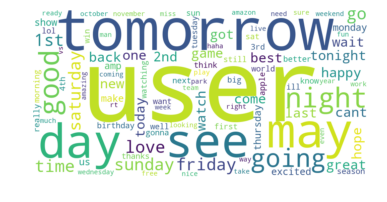

In [62]:
topWord_tweets(posTweets)

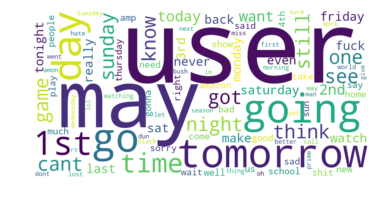

In [63]:
topWord_tweets(negTweets)

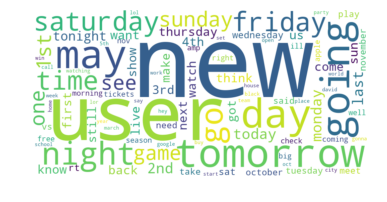

In [64]:
topWord_tweets(netTweets)